In [357]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
from ctr_function import dist_explore

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [358]:
ctr = pd.read_csv("data/test/ctr_ad_user_test.csv")

In [359]:
ctr.drop(['Unnamed: 0', 'nonclk', 'time_stamp'], axis = 1, inplace= True)

In [360]:
ctr['time'] = pd.to_datetime(ctr['time'])

In [361]:
ctr['hour'] = ctr['time'].dt.hour 

In [5]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270320 entries, 0 to 3270319
Data columns (total 18 columns):
user                     int64
adgroup_id               int64
pid                      object
clk                      int64
time                     datetime64[ns]
cate_id                  int64
campaign_id              int64
customer                 int64
brand                    float64
price                    float64
cms_segid                float64
cms_group_id             float64
final_gender_code        float64
age_level                float64
pvalue_level             float64
shopping_level           float64
occupation               float64
new_user_class_level     float64
dtypes: datetime64[ns](1), float64(10), int64(6), object(1)
memory usage: 449.1+ MB


In [182]:
ctr.head()

,user,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,117840,11,430548_1007,0,2017-05-06 02:12:23,5239,384809,25745,134255.0,176.0,49.0,6.0,2.0,6.0,2.0,3.0,0.0,2.0,2
1,421590,11,430548_1007,0,2017-05-06 01:29:04,5239,384809,25745,134255.0,176.0,0.0,4.0,2.0,4.0,NaN,1.0,0.0,NaN,1
2,1065947,15,430539_1007,0,2017-05-06 07:13:10,7023,397386,51962,7465.0,65.0,0.0,5.0,2.0,5.0,NaN,3.0,0.0,NaN,7
3,329004,38,430548_1007,0,2017-05-06 14:09:27,4535,394495,5122,387739.0,1800.0,76.0,10.0,1.0,4.0,3.0,2.0,0.0,4.0,14
4,36923,38,430539_1007,0,2017-05-06 14:24:47,4535,394495,5122,387739.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [7]:
ctr.columns

Index(['user', 'adgroup_id', 'pid', 'clk', 'time', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour'],
      dtype='object')

In [8]:
ctr.nunique()

user                     383353
adgroup_id               366284
pid                           2
clk                           2
time                      82856
cate_id                    5685
campaign_id              234228
customer                 154939
brand                     67642
price                      9987
cms_segid                    97
cms_group_id                 13
final_gender_code             2
age_level                     7
pvalue_level                  3
shopping_level                3
occupation                    2
new_user_class_level          4
hour                         24
dtype: int64

In [288]:
print('page views per user is %.2f'%(len(ctr)/ctr.user.nunique()))
print('views per ad is %.2f'%(len(ctr)/ctr.adgroup_id.nunique()))

page views per user is 8.53
views per ad is 8.93


In [362]:
ctr['pid'] = ctr.pid.apply(lambda x: 1 if x=='430548_1007' else 0)


In [363]:
ctr['price'] = ctr.price.apply(lambda x: np.log10(x))

In [58]:
ctr.to_csv('data/test/ctr_ad_user_test_ready.csv', index=False)

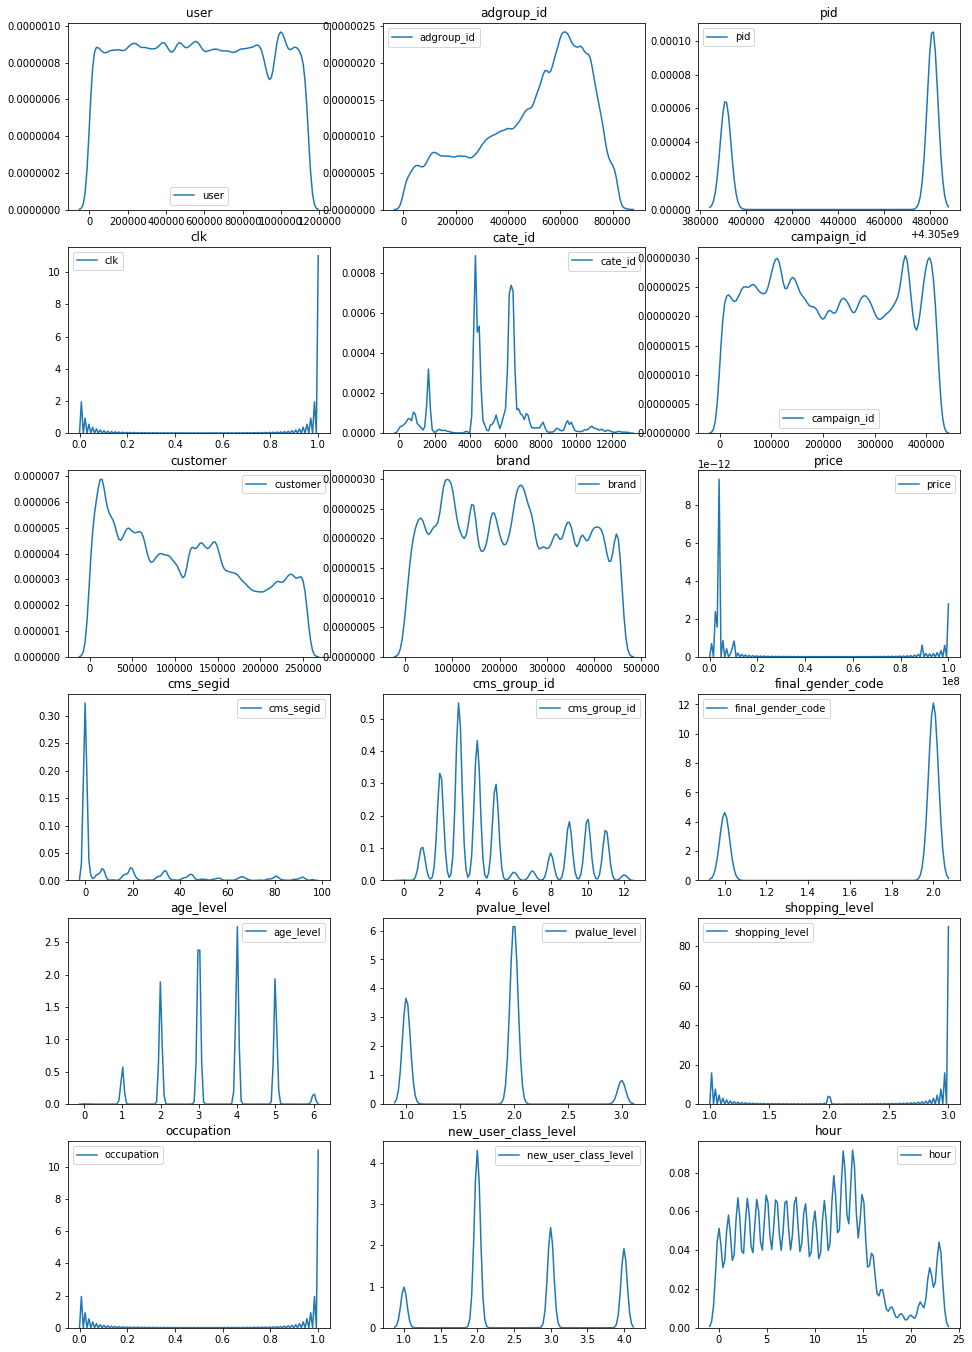

In [10]:
fig, axs = plt.subplots(6, 3, figsize =(16, 24))

cate_col_with_many_values = ['user', 'adgroup_id', 'pid', 'clk', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour']
for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr[cate_col_with_many_values[idx]], ax = ax)
    ax.set_title(cate_col_with_many_values[idx])

plt.savefig('Distribution_of_Available_Features.png')

In [189]:
ctr_sample = ctr.iloc[:100000]
ctr_sample['log_price']=np.log10(ctr_sample['price'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


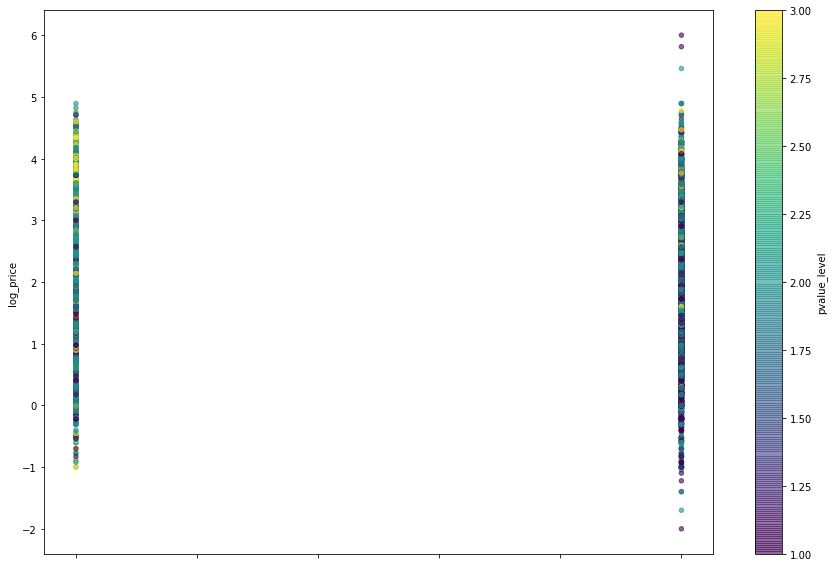

In [192]:
ctr_sample.plot(kind='scatter', x = 'pid', y='log_price', c='pvalue_level',
                cmap='viridis',alpha = 0.6, figsize=(15,10));

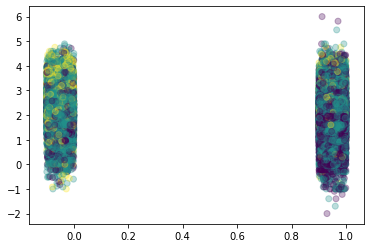

In [195]:
jitter = scs.uniform(-0.1,0.1).rvs(len(ctr_sample))
plt.scatter(x = ctr_sample['pid']+ jitter, y=ctr_sample['log_price'], c=ctr_sample['pvalue_level'],
                cmap='viridis',alpha = 0.3)

### Explore each features

##### views per user

In [218]:
user_view = ctr.groupby('user').count().sort_values('time', ascending=False)

In [250]:
user_view.head()

,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
user,,,,,,,,,,,,,,,,,,
40010,623,623,623,623,623,623,623,462,623,623,623,623,623,0,623,623,623,623
1087655,563,563,563,563,563,563,563,391,563,563,563,563,563,0,563,563,0,563
660380,553,553,553,553,553,553,553,412,553,0,0,0,0,0,0,0,0,553
557358,518,518,518,518,518,518,518,339,518,0,0,0,0,0,0,0,0,518
422201,514,514,514,514,514,514,514,183,514,514,514,514,514,514,514,514,0,514


We explore the distribution of the number of views per user below:

In [247]:
user_view_df = user_view.groupby('time').count().sort_index()

In [254]:
user_view_df.head(3)

,adgroup_id,pid,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
time,,,,,,,,,,,,,,,,,
1,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677,16677
2,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040
3,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434,181434


In [257]:
user_view_df['cum_perc'] = user_view_df['adgroup_id'].cumsum()*100/user_view_df['adgroup_id'].sum()

In [273]:
user_view_df['cum_perc'][:30]

time
1      4.350299
2      8.273576
3     55.601756
4     57.660694
5     59.492165
6     74.831552
7     75.985058
8     77.047004
9     83.529019
10    84.291241
11    84.969467
12    88.160781
13    88.675711
14    89.100385
15    90.750301
16    91.083414
17    91.384964
18    92.321437
19    92.555686
20    92.781066
21    93.329125
22    93.499464
23    93.667194
24    93.999264
25    94.130736
26    94.253599
27    94.475588
28    94.586973
29    94.708011
30    94.882523
Name: cum_perc, dtype: float64

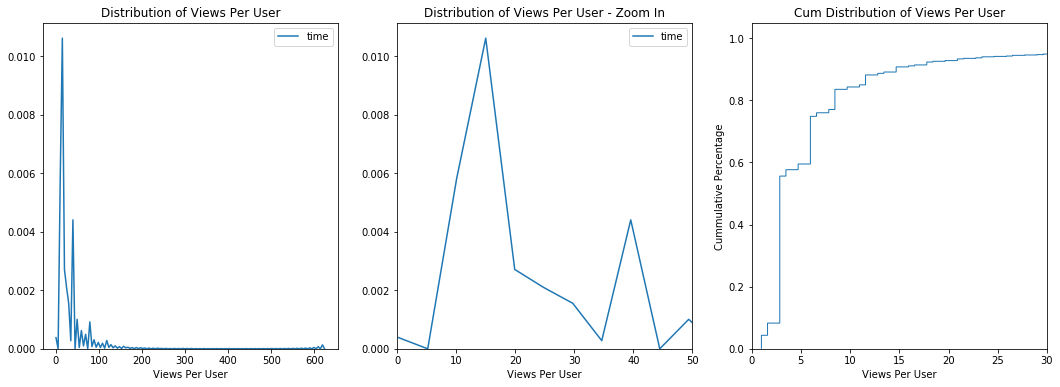

In [267]:
dist_explore(user_view['time'], 'Views Per User', 1000, 50, 30)
plt.savefig('DistributionOfViewsPerUser.png')

In [210]:
n = 10
user_view_times = sum(user_view['time'] <= n)/len(user_view)
print('%.3f of user have equal to or less than %d page views'%(user_view_times, n))

0.843 of user have equal to or less than 10 page views


60% of users have equal to or less than 5 page views;

84% of users have equal to or less than 10 page views

##### views per ad by a user

In [201]:
user_view_per_ad = ctr.groupby(['user', 'adgroup_id']).count().sort_values('time', ascending =False)

In [202]:
user_view_per_ad.head()

pid  clk  time  cate_id  campaign_id  customer  brand  \
user   adgroup_id                                                          
40010  633086        6    6     6        6            6         6      6   
       445291        5    5     5        5            5         5      0   
       648297        5    5     5        5            5         5      5   
660380 275050        5    5     5        5            5         5      5   
557358 163650        5    5     5        5            5         5      0   

                   price  cms_segid  cms_group_id  final_gender_code  \
user   adgroup_id                                                      
40010  633086          6          6             6                  6   
       445291          5          5             5                  5   
       648297          5          5             5                  5   
660380 275050          5          0             0                  0   
557358 163650          5          0             0                  0   

                   age_level  pvalue_level  shopping_level  occupation  \
user   adgroup_id                                                        
40010  633086              6             0               6           6   
       445291              5             0               5           5   
       648297              5             0               5           5   
660380 275050              0             0               0           0   
557358 163650              0             0               0           0   

                   new_user_class_level   hour  
user   adgroup_id                               
40010  633086                          6     6  
       445291                          5     5  
       648297                          5     5  
660380 275050                          0     5  
557358 163650                          0     5

In [268]:
user_view_per_ad.time.sum()/len(user_view_per_ad)

1.0115988410129475

In [271]:
len(user_view_per_ad[user_view_per_ad.time > 1]) /len(user_view_per_ad)

0.010771081497502338

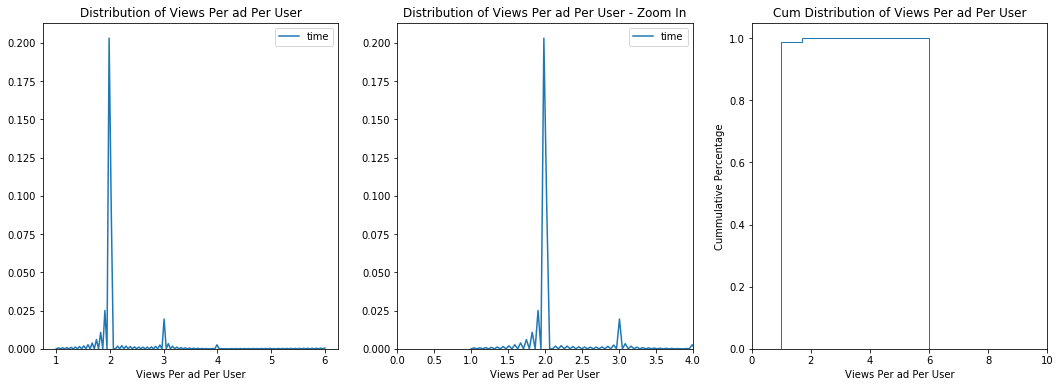

In [205]:
dist_explore(user_view_per_ad['time'], 'Views Per ad Per User', 7, 4, 10)

In [219]:
n = 2
view_ad_per_user_times = sum(user_view_per_ad['time'] <= n)/len(user_view_per_ad)
print('%.3f of user have the same ad equal to or less than %d times'%(view_ad_per_user_times, n))

0.999 of user have the same ad equal to or less than 2 times


98.9% of user see an ad once; 

1% of user see an ad twice

##### views per ad

In [275]:
ad_view = ctr.groupby('adgroup_id').count().sort_values('time')

In [276]:
ad_view.head()

,user,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
adgroup_id,,,,,,,,,,,,,,,,,,
846811,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
238983,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
238984,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
238986,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
514872,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1


In [277]:
ad_view['time'].sum()

3270320

In [280]:
ad_view_df = ad_view.groupby('time').count().sort_index()

In [281]:
ad_view_df.head()

,user,pid,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour,cum_perc
time,,,,,,,,,,,,,,,,,,
1,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199,141199
2,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411,55411
3,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988,31988
4,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644,21644
5,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748,15748


In [284]:
ad_view_df['cum_perc'] = ad_view_df['user'].cumsum()*100/ad_view_df['user'].sum()

In [289]:
ad_view_df['cum_perc'].head(30)

time
1     38.549049
2     53.676928
3     62.410042
4     68.319118
5     72.618515
6     75.891658
7     78.522676
8     80.669371
9     82.437944
10    83.903201
11    85.205742
12    86.305708
13    87.276813
14    88.148813
15    88.912156
16    89.624717
17    90.228347
18    90.791026
19    91.288454
20    91.744111
21    92.154175
22    92.518374
23    92.856909
24    93.164321
25    93.472824
26    93.752389
27    94.022398
28    94.244357
29    94.464405
30    94.670529
Name: cum_perc, dtype: float64

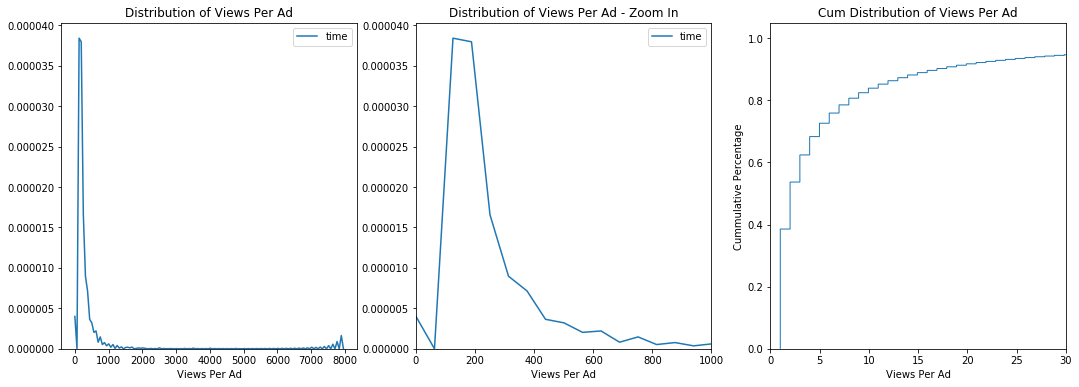

In [291]:
dist_explore(ad_view['time'], 'Views Per Ad', 8000, 1000, 30)
plt.savefig('DistributionOfViewsPerAd.png')

In [226]:
n = 20
ad_view_times = sum(ad_view['time'] <= n)/len(ad_view)
print('%.3f of adds get equal to or less than %d page views'%(ad_view_times, n))

0.917 of adds get equal to or less than 20 page views


0.624 of adds get equal to or less than 3 page views;

0.726 of adds get equal to or less than 5 page views;

0.839 of adds get equal to or less than 10 page views;

0.917 of adds get equal to or less than 20 page views

##### click through rate

In [300]:
ad_clk = ctr.groupby('adgroup_id').agg({'time': 'count', 'clk': 'sum'})

In [301]:
ad_clk['ctr'] = ad_clk['clk']/ad_clk['time']

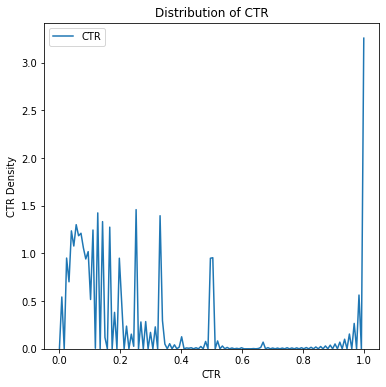

In [304]:
fig, ax = plt.subplots(1, 1, figsize =(6, 6))
sns.kdeplot(ad_clk['CTR'], ax = ax)
ax.set_title('Distribution of CTR')
ax.set_ylabel('CTR Density')
ax.set_xlabel('CTR')
plt.savefig('CTRDensityDistribution.png');
#ctr is continuous variable and the possibility of being a specific value is zero. So the y values can be more than 1

In [163]:
ad_clk.describe()

,time,clk,ctr
count,366284.000000,366284.000000,366284.000000
mean,8.928373,0.465024,0.043509
std,41.245280,3.204655,0.145252
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000
max,7956.000000,1056.000000,1.000000


In [302]:
ad_clk.columns = ['views', 'click', 'CTR']
ad_clk.sort_values('click', ascending= False).head()

,views,click,CTR
adgroup_id,,,
710164,7956,1056,0.132730
711852,4801,543,0.113101
747157,7026,461,0.065613
610477,2057,232,0.112786
632644,2214,220,0.099368


### Explore the relationship

In [365]:
ctr_clk = ctr[ctr.clk == 1]
ctr_noclk = ctr[ctr.clk == 0]

In [36]:
n = len(ctr_clk)
m = len(ctr_noclk)
print('the click through rate is %.3f'%(n/(n+m)))

the click through rate is 0.052


In [356]:
ctr_clk.nunique()

user                     106314
adgroup_id                72321
pid                           1
clk                           1
time                      63335
cate_id                    3483
campaign_id               59552
customer                  46530
brand                     24288
price                      4419
cms_segid                    97
cms_group_id                 13
final_gender_code             2
age_level                     7
pvalue_level                  3
shopping_level                3
occupation                    2
new_user_class_level          4
hour                         24
dtype: int64

In [366]:
related_features = ['adgroup_id', 'pid', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour']
y = ctr.clk

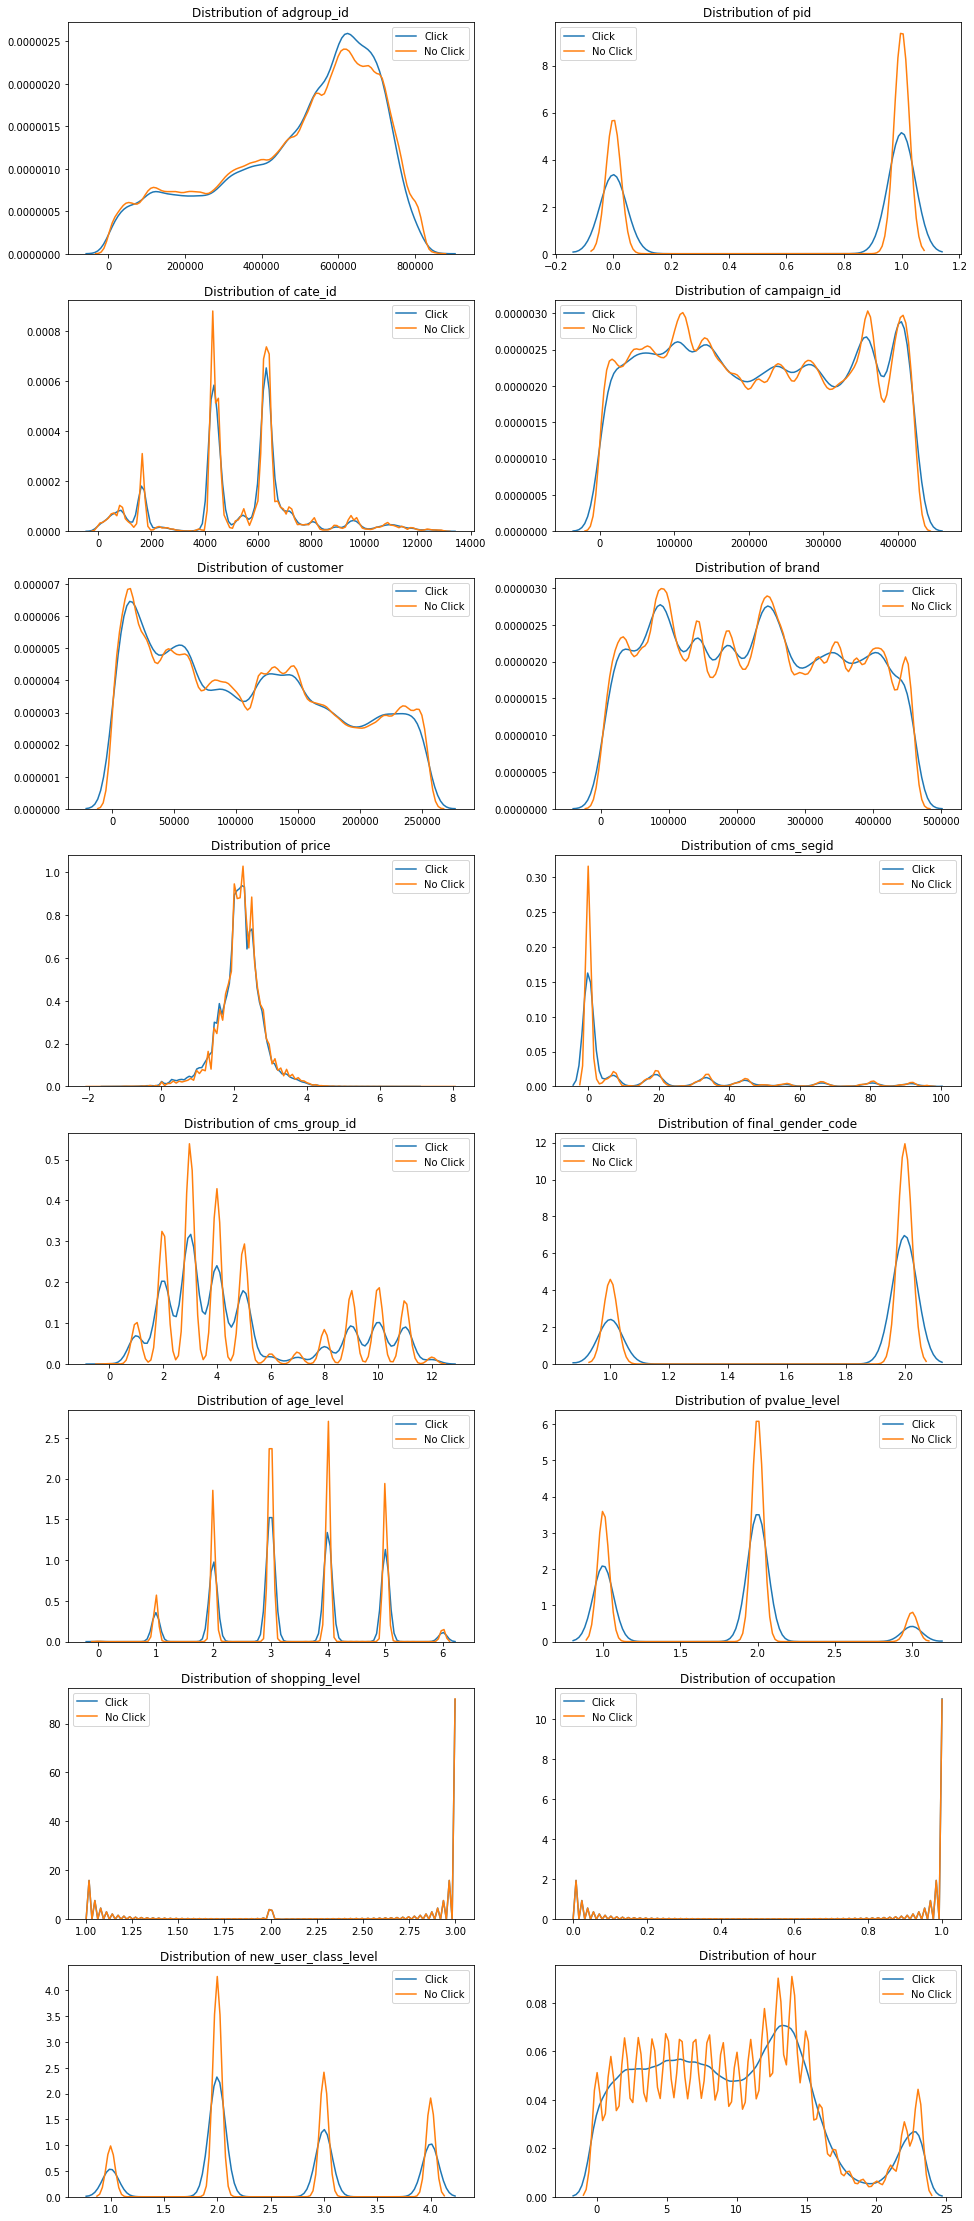

In [367]:
fig, axs = plt.subplots(8, 2, figsize =(16, 40))


for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr_clk[related_features[idx]], ax = ax, label = 'Click', legend = True)
    sns.kdeplot(ctr_noclk[related_features[idx]], ax = ax, label = 'No Click', legend = True)
    ax.set_title('Distribution of %s' %related_features[idx])
    
plt.savefig('Distribution_of_Features_in_clk_noclk_groups.png')

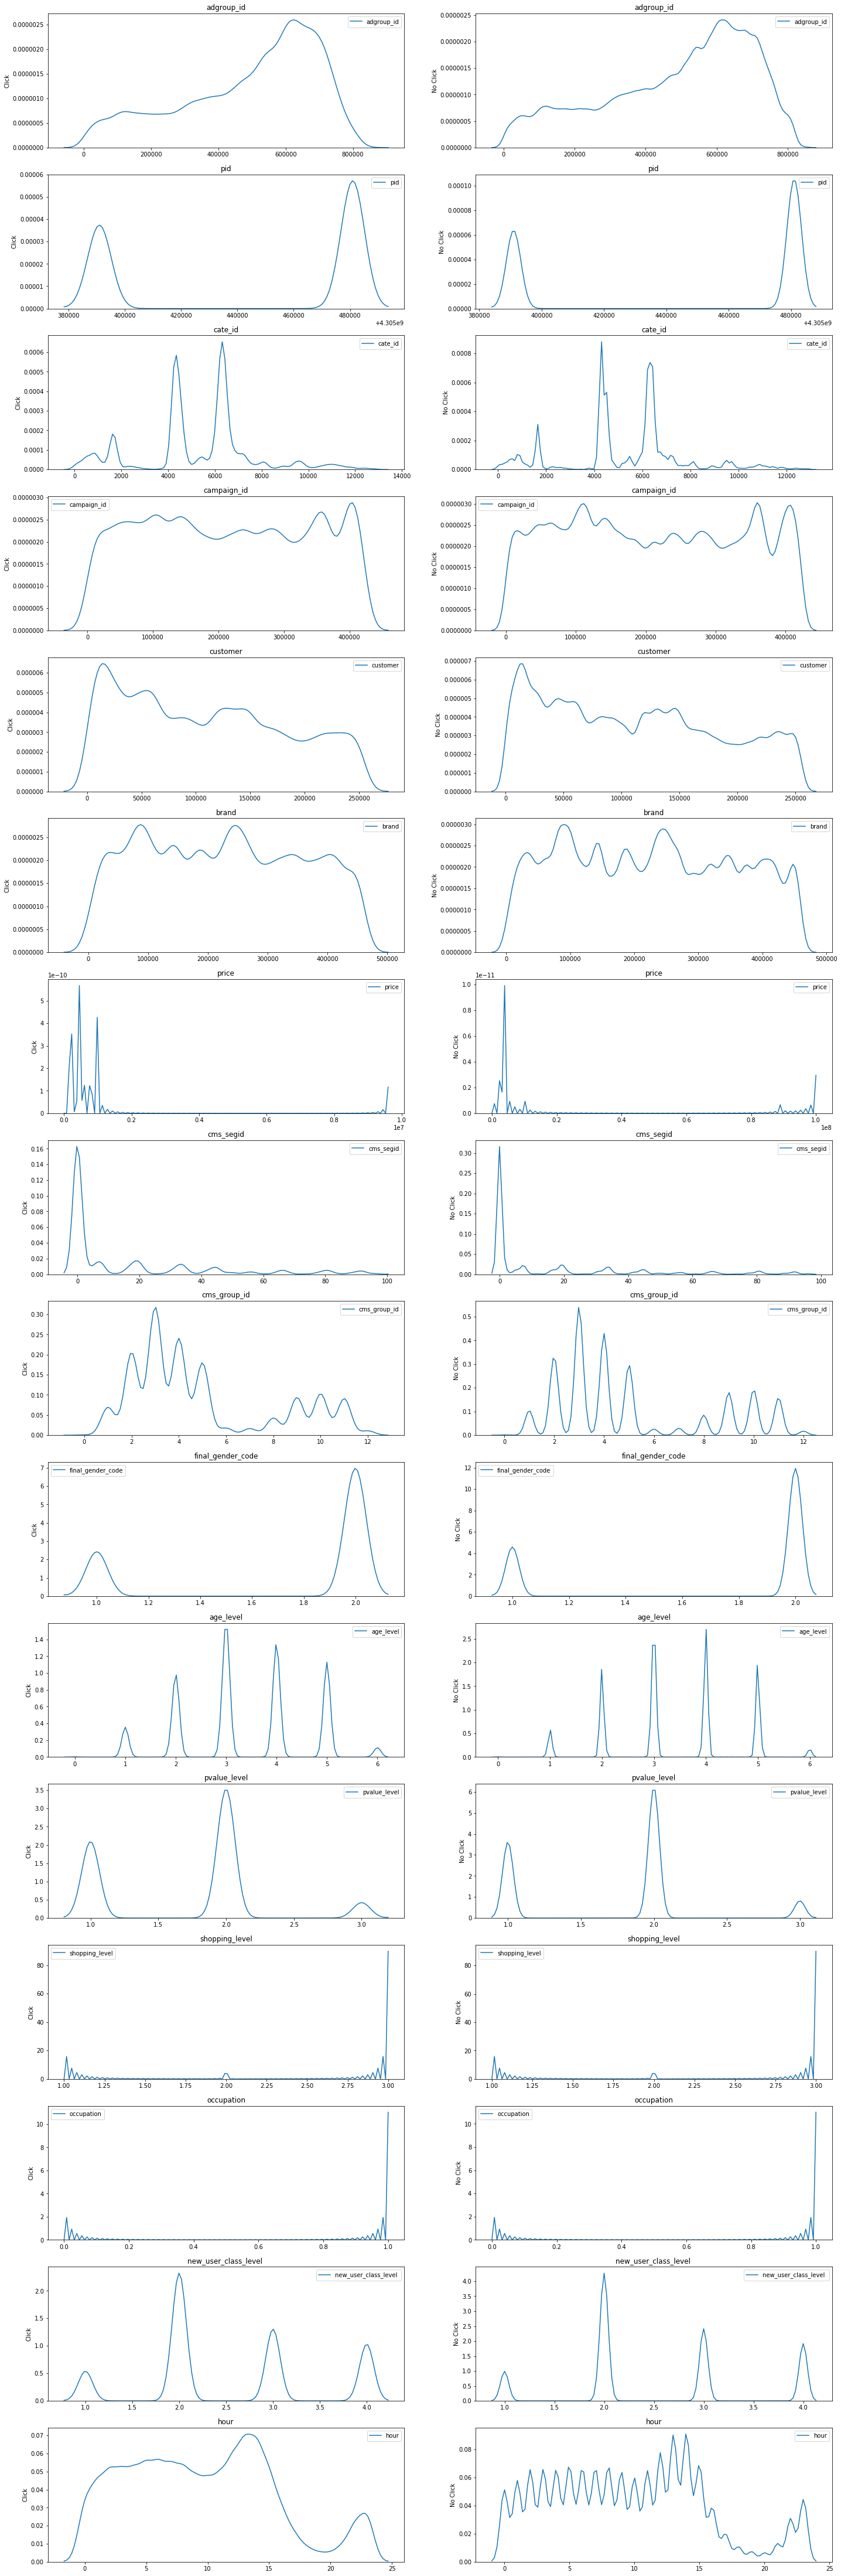

In [44]:
fig, axs = plt.subplots(16, 2, figsize =(24, 80))


for idx, ax in enumerate(axs.flatten()):
    if idx % 2 == 0:
        sns.kdeplot(ctr_clk[related_features[int(idx/2)]], ax = ax)
        ax.set_title(related_features[int(idx/2)])
        ax.set_ylabel('Click')
    if idx % 2 == 1:
        sns.kdeplot(ctr_noclk[related_features[int((idx-1)/2)]], ax = ax)
        ax.set_title(related_features[int((idx-1)/2)])
        ax.set_ylabel('No Click')
    

From the distribution of the features for the click and no-click group, the distributions of the features 'shopping_level' and 'occupation' for the two groups are highly overlapped.

* 'adgroup_id' - distribution is similar in two groups
* 'pid' - Different
* 'cate_id' - Different
* 'campaign_id' - slightly diff
* 'customer' -
* 'brand' -
* 'price' -
* 'cms_segid' -
* 'cms_group_id'-
* 'final_gender_code' -
* 'age_level' -
* 'pvalue_level' -
* 'shopping_level' - distribution is similar in two groups
* 'occupation'- distribution is similar in two groups
* 'new_user_class_level ' - 
* 'hour'

#### Handle missing values

In [54]:
missing_pct = ctr.isnull().sum()/len(ctr)
missing_pct

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.307273
price                    0.000000
cms_segid                0.060600
cms_group_id             0.060600
final_gender_code        0.060600
age_level                0.060600
pvalue_level             0.550642
shopping_level           0.060600
occupation               0.060600
new_user_class_level     0.313952
hour                     0.000000
dtype: float64

For the missing values, we simply dropped the 6% entries missing most of user features. For the three features ('brand', 'Pvalue' and 'new_user_class_level') have a high ratio of missing values, we imputed mode for now.

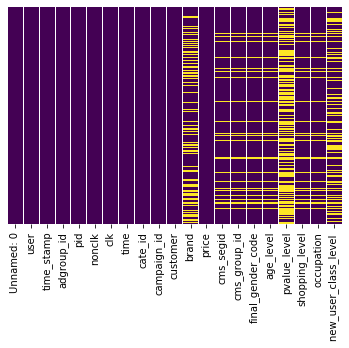

In [7]:
sns.heatmap(ctr.isnull(), yticklabels=False, cbar=False, cmap='viridis')

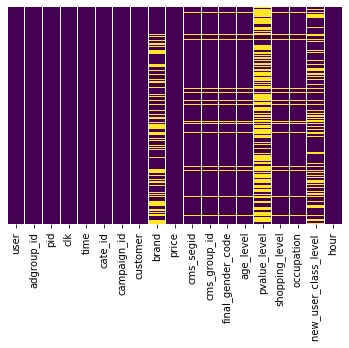

In [54]:
sns.heatmap(ctr_clk.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
missing_pct_clk = ctr_clk.isnull().sum()/len(ctr_clk)
missing_pct_clk

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.330644
price                    0.000000
cms_segid                0.063171
cms_group_id             0.063171
final_gender_code        0.063171
age_level                0.063171
pvalue_level             0.555319
shopping_level           0.063171
occupation               0.063171
new_user_class_level     0.319854
hour                     0.000000
dtype: float64

In [56]:
missing_pct_noclk = ctr_noclk.isnull().sum()/len(ctr_noclk)
missing_pct_noclk

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.305989
price                    0.000000
cms_segid                0.060459
cms_group_id             0.060459
final_gender_code        0.060459
age_level                0.060459
pvalue_level             0.550385
shopping_level           0.060459
occupation               0.060459
new_user_class_level     0.313627
hour                     0.000000
dtype: float64

The missing values is randomly distributed and the missing percentage is almost same in both of clk and noclk groups. So we simply drop the entries without user features and 1) drop, or 2) impute mode for 'brand', 'pvalue_level' and 'new_user_class_level'

In [368]:
drop_index = ctr[ctr['cms_segid'].isnull()].index

In [369]:
ctr_complete = ctr.drop(drop_index, axis = 0)

In [370]:
ctr_complete_filled = ctr_complete.fillna(ctr_complete.mode().iloc[0])

In [52]:
ctr_complete_noclk = ctr_complete_filled[ctr_complete_filled.clk == 0]
ctr_complete_clk = ctr_complete_filled[ctr_complete_filled.clk == 1]

##### Comparison after imputation

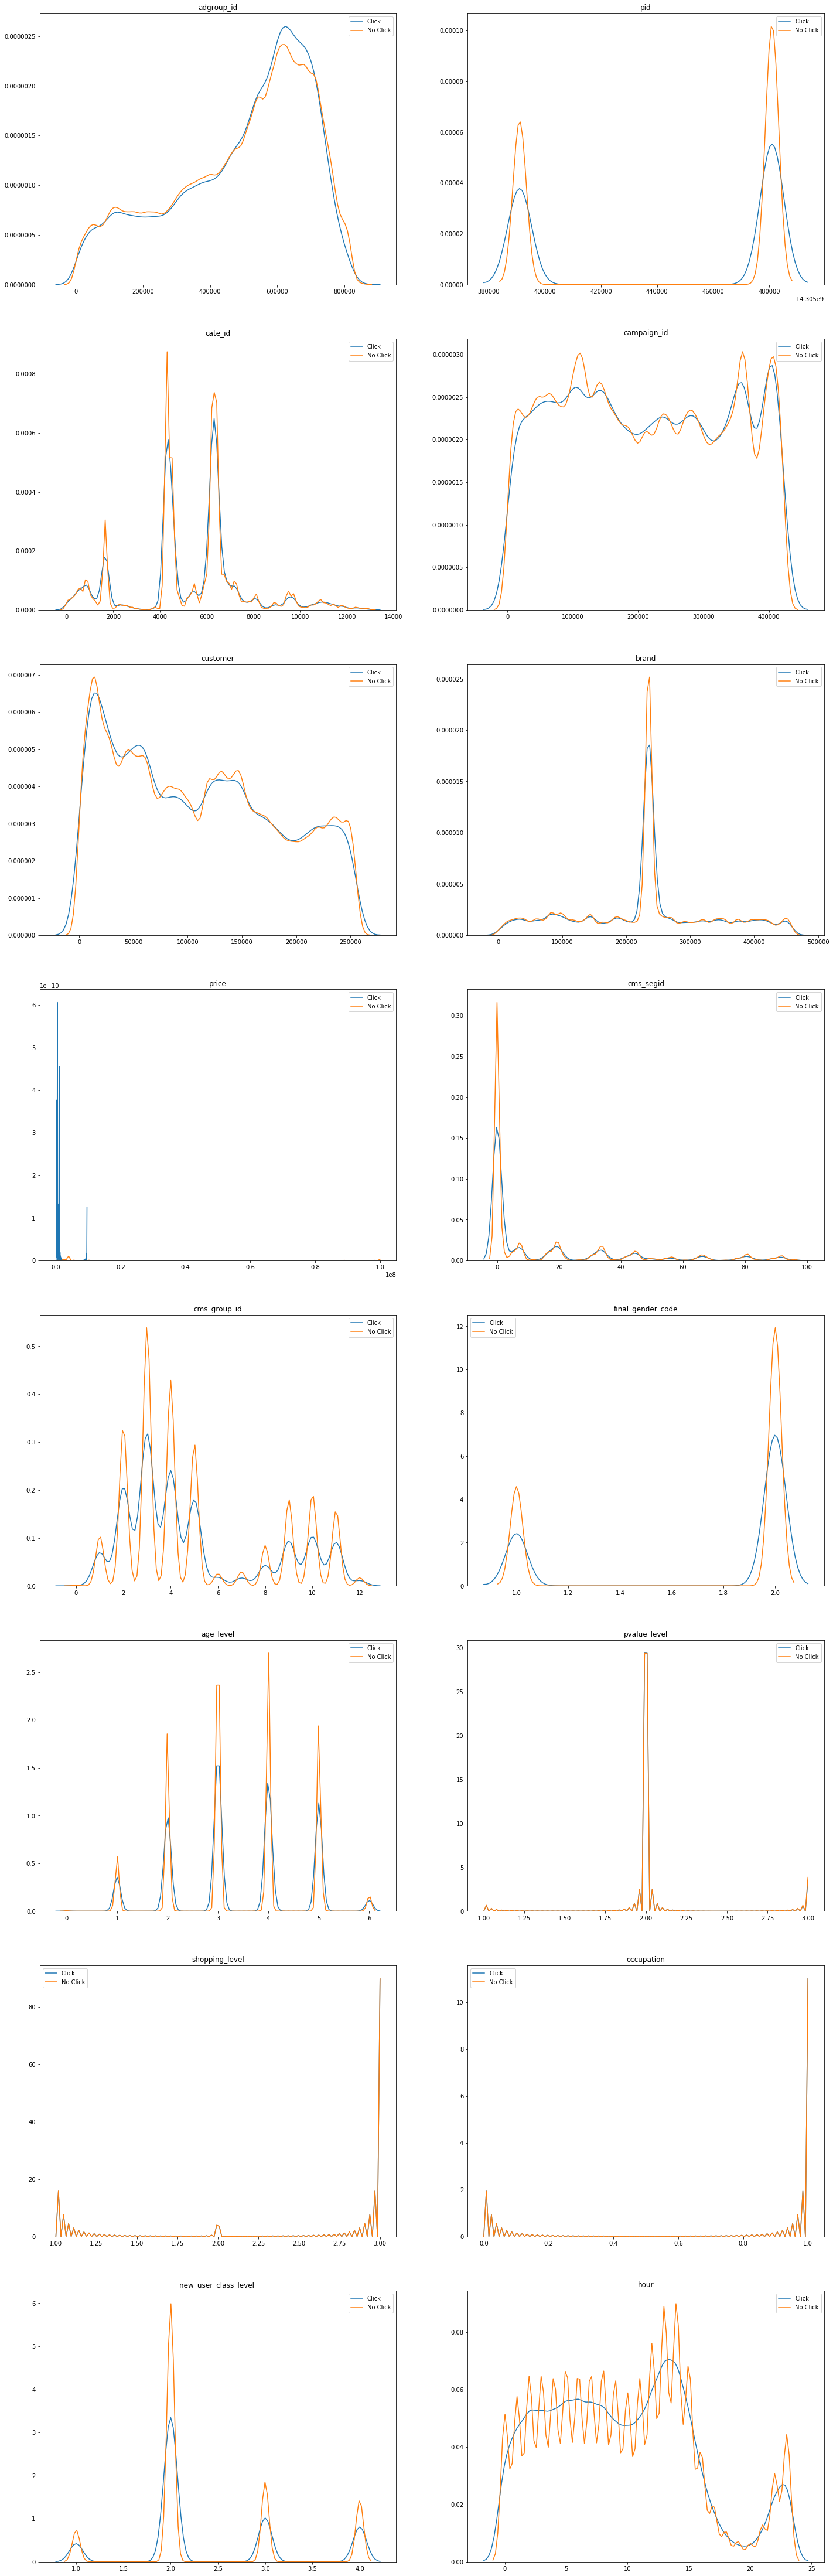

In [53]:
fig, axs = plt.subplots(8, 2, figsize =(24, 80))


for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr_complete_clk[related_features[idx]], ax = ax, label = 'Click', legend = True)
    sns.kdeplot(ctr_complete_noclk[related_features[idx]], ax = ax, label = 'No Click', legend = True)
    ax.set_title(related_features[idx])

##### chi-square test for feature selection

In [371]:
ctr_chi2 = ctr_complete_filled.copy()
y = ctr_chi2.pop('clk')

In [372]:
#'time' is converted to hour, 'price' is the only numeric feature
ctr_chi2.drop(['user', 'time', 'price'], axis =1, inplace=True)

In [373]:
x = ctr_chi2

In [374]:
x.head()

,adgroup_id,pid,cate_id,campaign_id,customer,brand,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,11,1,5239,384809,25745,134255.0,49.0,6.0,2.0,6.0,2.0,3.0,0.0,2.0,2
1,11,1,5239,384809,25745,134255.0,0.0,4.0,2.0,4.0,2.0,1.0,0.0,2.0,1
2,15,0,7023,397386,51962,7465.0,0.0,5.0,2.0,5.0,2.0,3.0,0.0,2.0,7
3,38,1,4535,394495,5122,387739.0,76.0,10.0,1.0,4.0,3.0,2.0,0.0,4.0,14
5,38,1,4535,394495,5122,387739.0,88.0,11.0,1.0,5.0,1.0,3.0,0.0,1.0,13


In [375]:
chi2_stats, p_values = chi2(x, y)

In [377]:
x.columns

Index(['adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer', 'brand',
       'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ',
       'hour'],
      dtype='object')

In [376]:
chi2_test = pd.DataFrame({'chi2_stats':chi2_stats, 'p_values': p_values}, columns=['chi2_stats', 'p_values'], index =x.columns)
chi2_test

,chi2_stats,p_values
adgroup_id,2.734716e+06,0.000000e+00
pid,9.704074e+01,6.791531e-23
cate_id,6.669460e+04,0.000000e+00
campaign_id,6.668433e+06,0.000000e+00
customer,3.241516e+06,0.000000e+00
brand,3.573674e+05,0.000000e+00
cms_segid,3.337331e+03,0.000000e+00
cms_group_id,5.077701e+02,1.938098e-112
final_gender_code,3.503076e+01,3.245375e-09
age_level,4.672299e+00,3.065286e-02


In [57]:
ctr_complete_filled.to_csv('data/test/ctr_ad_user_test_imputed.csv')